In [48]:
# General overview of measurement https://tenpy.readthedocs.io/en/latest/intro/measurements.html
from tenpy.networks.site import SpinSite
from tenpy.networks.mps import TransferMatrix
from tenpy.linalg import np_conserved as npc
import numpy as np
from tenpy.networks.mps import MPS
import h5py
from tenpy.tools import hdf5_io
import glob
import numpy as np
import matplotlib.pyplot as plt
import tenpy.linalg as npc
from analysis_tools import MPS_drop_charge, check_onsite_symmetry, list_contract, fix_norm, check_A4_class

In [54]:
paths = ['./resume_test/dmrg_savepsi_A4SpinChain_chi_0146_L_2.000_lamb_0.855_mu_2.000.h5','./resume_test/results/dmrg_savepsi_A4SpinChain_chi_0146_L_2.000_lamb_0.855_mu_2.000.h5']

In [55]:
result = []
for fname in paths:#glob.glob('./results/dmrg_savepsi_A4SpinChain_chi_*_L_2.000_lamb_0.865_mu_2.000.h5'):
    with h5py.File(fname) as f:
        data = hdf5_io.load_from_hdf5(f)
        result.append(data)

In [56]:
len(result), result[0].keys(), result[0]['psi'].chi[0]

(2,
 dict_keys(['energy', 'finished_run', 'measurements', 'psi', 'resume_data', 'simulation_parameters', 'sweep_stats', 'update_stats', 'version_info']),
 146)

7.116537653367619e-05
7.115177167770937e-05


Text(0.5, 0, 'Time step')

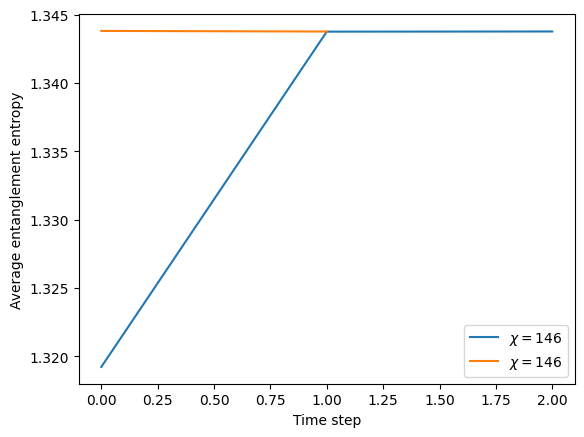

In [59]:
for r in result:
    plt.plot(r['sweep_stats']['S'],label=r'$\chi=$'+str(r['psi'].chi[0]))
    print(r['psi'].get_SL(0)[-1])
    #plt.axhline(np.log(r['psi'].chi[0])/3)
plt.legend()
plt.ylabel(r'Average entanglement entropy')
plt.xlabel(r'Time step')

In [36]:
pp= r['psi'].get_SL(0)**2

In [38]:
np.sum(-pp*np.log(pp))

1.5535372772467488

In [41]:
np.log(150)

5.0106352940962555

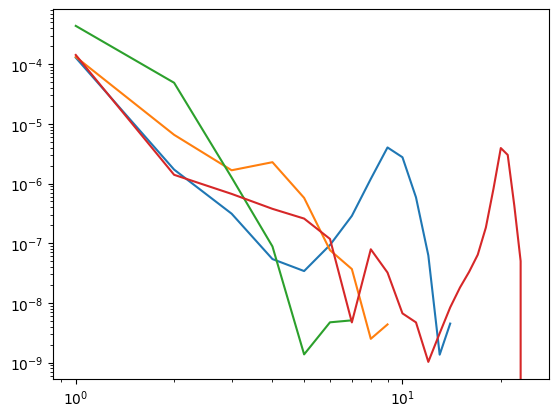

In [12]:
for r in result:
    plt.plot(np.abs(np.array(result[-1]['sweep_stats']['Delta_E'][-1])-np.array(r['sweep_stats']['Delta_E'])))
plt.yscale('log')
plt.xscale('log')

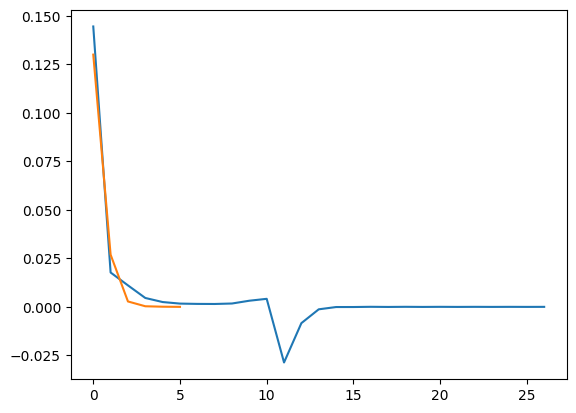

In [15]:
plt.plot(result[-1]['sweep_stats']['Delta_S'])
plt.plot(result[-10]['sweep_stats']['Delta_S'])

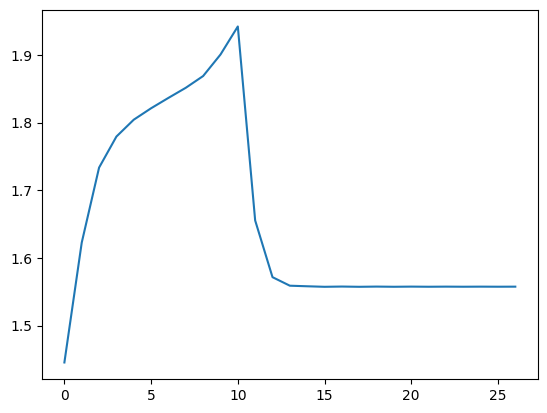

In [18]:
plt.plot(result[-1]['sweep_stats']['S'])

In [ ]:
xi = []
S = []
with open('./correlation_length.csv','w') as f:
    pass
for r in result:
    psi = r['psi']
    print(f'Bond dimension: {psi.chi}')
    xi.append(psi.correlation_length())
    S.append(psi.entanglement_entropy()[0])
    with open('./correlation_length.csv','a') as f:
            f.write(f'{xi[-1]},{S[-1]}\n')

Bond dimension: [20, 20]
Bond dimension: [22, 22]
Bond dimension: [24, 24]
Bond dimension: [26, 26]
Bond dimension: [28, 28]
Bond dimension: [30, 30]
Bond dimension: [33, 33]
Bond dimension: [35, 35]
Bond dimension: [38, 38]
Bond dimension: [41, 41]
Bond dimension: [45, 45]
Bond dimension: [48, 48]
Bond dimension: [52, 52]
Bond dimension: [57, 57]
Bond dimension: [61, 61]
Bond dimension: [66, 66]


[20, 20]

In [11]:
result[-1]['psi'].correlation_length()

KeyboardInterrupt: 

In [12]:
len(result)

31

In [14]:
result[-1]['psi'].get_SL(0)

array([6.21002159e-01, 6.21002159e-01, 2.15549781e-01, 2.15549781e-01,
       2.15549781e-01, 2.15549781e-01, 8.17705024e-02, 8.17705024e-02,
       6.31752841e-02, 6.31752841e-02, 6.31752841e-02, 6.31752841e-02,
       3.94718179e-02, 3.94718179e-02, 3.94718176e-02, 3.94718176e-02,
       3.70139025e-02, 3.70139025e-02, 2.36841077e-02, 2.36841077e-02,
       2.36841073e-02, 2.36841073e-02, 1.53044467e-02, 1.53044467e-02,
       1.20715209e-02, 1.20715209e-02, 1.11591327e-02, 1.11591327e-02,
       1.11591327e-02, 1.11591327e-02, 8.82451462e-03, 8.82451462e-03,
       8.15785077e-03, 8.15785077e-03, 8.15785068e-03, 8.15785068e-03,
       6.53602610e-03, 6.53602610e-03, 6.21293513e-03, 6.21293513e-03,
       6.21293512e-03, 6.21293512e-03, 4.90298939e-03, 4.90298939e-03,
       4.90298927e-03, 4.90298927e-03, 4.67924554e-03, 4.67924554e-03,
       4.12822173e-03, 4.12822173e-03, 4.12822171e-03, 4.12822171e-03,
       3.59291390e-03, 3.59291390e-03, 3.21943627e-03, 3.21943627e-03,
      